In [96]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [97]:
import numpy as np
import pandas as pd

In [98]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [99]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

#### Inspecting available "tables"

In [100]:
Base = automap_base()

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

Base.prepare(engine, reflect = True)
#Base.classes.keys()
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

#### Inspecting content of each table

In [101]:
#See Measurement Table

col_measurement = inspector.get_columns('measurement')
for column in col_measurement:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [102]:
#See Station Table

col_measurement = inspector.get_columns('station')
for column in col_measurement:
    print(column["name"], column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


#### Reflecting the SQL

In [103]:

# reflect an existing database into a new model
Measurement = Base.classes.measurement
Station = Base.classes.station

# reflect the tables

In [104]:
# We can view all of the classes that automap found


In [105]:
# Save references to each table


In [106]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [107]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

measurement_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-07-31') .all()


date_spacing = round(len(measurement_result)/10, 0)


In [108]:
measurement_result_df = pd.DataFrame(measurement_result)
measurement_result_df

,date,prcp
0,2016-08-01,0.08
1,2016-08-02,0.05
2,2016-08-03,0.00
3,2016-08-04,0.04
4,2016-08-05,0.01
...,...,...
2367,2017-08-19,0.09
2368,2017-08-20,NaN
2369,2017-08-21,0.56
2370,2017-08-22,0.50


In [109]:
ticks=np.arange(0,int(len(measurement_result)+1), int(date_spacing))
date_label = measurement_result_df.index[ticks].to_list()

date_label


[0, 237, 474, 711, 948, 1185, 1422, 1659, 1896, 2133, 2370]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

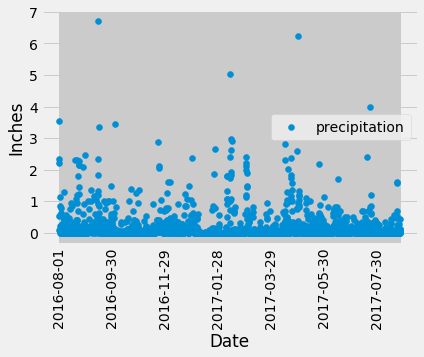

In [110]:


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


fig, ax = plt.subplots()

plt.scatter(measurement_result_df["date"], measurement_result_df["prcp"])
every_nth = 60


for n, label in enumerate(ax.xaxis.get_ticklabels() ):
    if n % every_nth != 0:
        label.set_visible(False)


plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"])
plt.xticks(rotation=90)



In [111]:
a = np.arange(358,2158,358)

len(np.arange(max(a)))

2148

In [112]:
# Use Pandas to calculate the summary statistics for the precipitation data

measurement_df.describe()

,prcp
count,2148.000000
mean,0.182896
std,0.467339
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


### Station Analysis

In [113]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count

9

In [114]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#group by
from sqlalchemy import desc

active_count = session.query(Measurement.station, func.count(Measurement.station) ).\
                group_by(Measurement.station).all()
station_count_df = pd.DataFrame(active_count, columns = ["station","count"]).sort_values("count", ascending = False)
most_active_station = station_count_df.iloc[0]["station"]

In [115]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_min = session.query(Measurement.station, func.min(Measurement.tobs) ).\
                filter(Measurement.station == most_active_station).all()
temp_max = session.query(Measurement.station, func.max(Measurement.tobs) ).\
                filter(Measurement.station == most_active_station).all()
temp_avg = session.query(Measurement.station, func.avg(Measurement.tobs) ).\
                filter(Measurement.station == most_active_station).all()

print(temp_min)
print(temp_max)
print(temp_avg)

[('USC00519281', 54.0)]
[('USC00519281', 85.0)]
[('USC00519281', 71.66378066378067)]


In [116]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_count = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.station == most_active_station).\
                filter(Measurement.date > '2016-07-31' ).all()


most_active_df = pd.DataFrame(active_count)

start_date = most_active_df["date"].head(1).values.item()
end_date = most_active_df["date"].tail(1).values.item()

start_date

'2016-08-01'

Text(0, 0.5, 'Frequency')

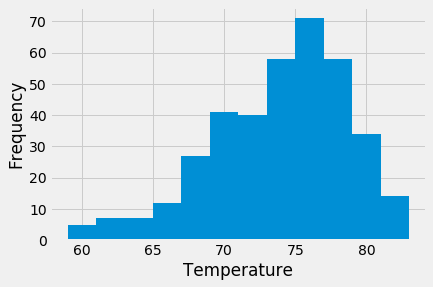

In [117]:


plt.hist(most_active_df["tobs"], bins = 12  )
plt.xlabel("Temperature")
plt.ylabel("Frequency")

## Bonus Challenge Assignment

### Temp Analysis 1

In [118]:
h_measure_path = (f"Resources/hawaii_measurements.csv")
h_stations_path = (f"Resources/hawaii_stations.csv")

h_measure_df = pd.read_csv(h_measure_path)
h_stations_path = pd.read_csv(h_stations_path)


# You have to convert the column into date
h_measure_df["date"] = pd.to_datetime(h_measure_df["date"])
h_measure_df.head()
#h_stations_path.head()


,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [119]:
# get all June temperature, and average
June = h_measure_df[h_measure_df["date"].dt.strftime('%m') == '06']
December = h_measure_df[h_measure_df["date"].dt.strftime('%m') == '12']
print(June["tobs"].mean())
print(December["tobs"].mean())

74.94411764705882
71.04152933421226


In [120]:
from random import uniform, random, choice, sample


In [122]:
import scipy.stats as stats


In [125]:
print(stats.ttest_ind(June["tobs"], December["tobs"]) )



print("June and December are significantly different")

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)
June and December are significantly different


In [ ]:
#December["tobs"].hist()

### Temp Analysis II

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_avg = calc_temps(start_date, end_date)

#2016-08-18	"
#2017-08-18"
trip_avg[0]

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.bar(x=0, width= 5,height = trip_avg[0][1], yerr=(trip_avg[0][2] - trip_avg[0][0]) )
#plt.bar(x=0, height = 20, yerr=(20))
plt.title("Trip Avg Temp")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tight_layout()

### Daily Rainfall Average

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
from datetime import date, timedelta

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

date_range= session.query(func.strftime('%m-%d', Measurement.date)).\
                filter(Measurement.date >= '2016-01-01').\
                filter(Measurement.date <= '2017-01-01').all()

date_range = np.ravel(date_range)

normals=[]

for days in date_range:
    normals.append(daily_normals(days) )

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
